In [1]:
library(dplyr)
library(ggplot2)
library(haven)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# 1.1
DQdata <- read_xpt("data/P_DIQ.XPT")
BMdata <- read_xpt("data/P_BMX.XPT")
BPdata <- read_xpt("data/P_BPQ.XPT")
AUdata <- read_xpt("data/P_ALQ.XPT")

DQdata_selected <- select(DQdata, SEQN, DIQ010)
BMdata_selected <- select(BMdata, SEQN, BMXWT, BMXHT, BMXWAIST, BMXHIP, BMXBMI)
BMdata_selected <- subset(BMdata_selected, is.na(BMdata$BMIWT) & is.na(BMdata$BMIHT))
BPdata_selected <- select(BPdata, SEQN, BPQ020, BPQ080)
AUdata_selected <- select(AUdata, SEQN, ALQ121, ALQ130)

In [3]:
# 1.2
OtData_selected <- merge(DQdata_selected, BMdata_selected, by = "SEQN", all.x = TRUE)
OtData_selected <- merge(OtData_selected, BPdata_selected, by = "SEQN", all.x = TRUE)
OtData_selected <- merge(OtData_selected, AUdata_selected, by = "SEQN", all.x = TRUE)
OtData_selected <- na.omit(OtData_selected)

cat("\nProblem 1.2\n\n")
print(summary(OtData_selected))


Problem 1.2

      SEQN            DIQ010          BMXWT            BMXHT      
 Min.   :109266   Min.   :1.000   Min.   : 36.80   Min.   :141.1  
 1st Qu.:113266   1st Qu.:2.000   1st Qu.: 68.50   1st Qu.:160.8  
 Median :117177   Median :2.000   Median : 81.10   Median :167.7  
 Mean   :117170   Mean   :1.911   Mean   : 84.41   Mean   :168.0  
 3rd Qu.:121130   3rd Qu.:2.000   3rd Qu.: 96.70   3rd Qu.:175.1  
 Max.   :124822   Max.   :9.000   Max.   :223.50   Max.   :199.6  
    BMXWAIST         BMXHIP          BMXBMI          BPQ020         BPQ080     
 Min.   : 61.1   Min.   : 74.0   Min.   :14.60   Min.   :1.00   Min.   :1.000  
 1st Qu.: 87.9   1st Qu.: 97.3   1st Qu.:24.70   1st Qu.:1.00   1st Qu.:1.000  
 Median : 98.9   Median :104.9   Median :28.70   Median :2.00   Median :2.000  
 Mean   :100.3   Mean   :107.4   Mean   :29.84   Mean   :1.67   Mean   :1.723  
 3rd Qu.:111.0   3rd Qu.:114.7   3rd Qu.:33.60   3rd Qu.:2.00   3rd Qu.:2.000  
 Max.   :187.5   Max.   :187.5   Max.

In [4]:
# 2.1
OtData_selected <- subset(OtData_selected, OtData_selected$DIQ010 < 3)
OtData_selected <- transform(OtData_selected, DIQ010 = abs(DIQ010 - 2))
OtData_selected <- subset(OtData_selected, OtData_selected$BPQ020 < 3 & OtData_selected$BPQ080 < 3)
OtData_selected <- subset(OtData_selected, OtData_selected$ALQ121 < 11 & OtData_selected$ALQ130 < 16)

In [5]:
# 2.2
Overweight <- ifelse(OtData_selected$BMXWT / (OtData_selected$BMXHT / 100)^2 > 30, 1, 0)
OtData_selected$Overweight <- Overweight

cat("\nProblem 2.2\n\n")
P22H0 <- c("(H0) There is no association between Height and BMI\n")
P22H1 <- c("(H1) There is an association between Height and BMI\n")
cat(P22H0, P22H1)

HvsBMI.res <- cor.test(OtData_selected$BMXBMI, OtData_selected$BMXHT, method = "pearson")
print(HvsBMI.res)

HvsBMI.lm <- lm(BMXBMI ~ I(BMXWT / (BMXHT / 100)^2), data = OtData_selected)
print(summary(HvsBMI.lm))
cat("AS the Adjusted R-squared is 1, the calculate BMI is consistent with the result obtained\n")


Problem 2.2

(H0) There is no association between Height and BMI
 (H1) There is an association between Height and BMI

	Pearson's product-moment correlation

data:  OtData_selected$BMXBMI and OtData_selected$BMXHT
t = -2.4617, df = 5426, p-value = 0.01386
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.059951509 -0.006802975
sample estimates:
        cor 
-0.03340086 


Call:
lm(formula = BMXBMI ~ I(BMXWT/(BMXHT/100)^2), data = OtData_selected)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.050214 -0.024855 -0.000059  0.024914  0.049759 

Coefficients:
                        Estimate Std. Error   t value Pr(>|t|)    
(Intercept)            0.0004068  0.0016368     0.249    0.804    
I(BMXWT/(BMXHT/100)^2) 0.9999925  0.0000534 18725.280   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02875 on 5426 degrees of freedom
Multiple R-squared:      1,	Adjusted R-square

In [6]:
# 2.3
cat("\nProblem 2.3\n\n")
print(sapply(OtData_selected, is.factor))
cat("\n")
print(apply(OtData_selected, 2, class))


Problem 2.3

      SEQN     DIQ010      BMXWT      BMXHT   BMXWAIST     BMXHIP     BMXBMI 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
    BPQ020     BPQ080     ALQ121     ALQ130 Overweight 
     FALSE      FALSE      FALSE      FALSE      FALSE 

      SEQN     DIQ010      BMXWT      BMXHT   BMXWAIST     BMXHIP     BMXBMI 
 "numeric"  "numeric"  "numeric"  "numeric"  "numeric"  "numeric"  "numeric" 
    BPQ020     BPQ080     ALQ121     ALQ130 Overweight 
 "numeric"  "numeric"  "numeric"  "numeric"  "numeric" 


In [7]:
# 2.4
cat("\nProblem 2.4\n\n")
print(summary(OtData_selected))


Problem 2.4

      SEQN            DIQ010          BMXWT            BMXHT      
 Min.   :109266   Min.   :0.000   Min.   : 36.80   Min.   :141.1  
 1st Qu.:113264   1st Qu.:0.000   1st Qu.: 68.30   1st Qu.:160.8  
 Median :117152   Median :0.000   Median : 81.00   Median :167.7  
 Mean   :117158   Mean   :0.119   Mean   : 84.22   Mean   :168.0  
 3rd Qu.:121116   3rd Qu.:0.000   3rd Qu.: 96.40   3rd Qu.:175.0  
 Max.   :124822   Max.   :1.000   Max.   :210.80   Max.   :199.6  
    BMXWAIST          BMXHIP           BMXBMI          BPQ020     
 Min.   : 61.10   Min.   : 74.00   Min.   :14.60   Min.   :1.000  
 1st Qu.: 87.60   1st Qu.: 97.28   1st Qu.:24.70   1st Qu.:1.000  
 Median : 98.65   Median :104.90   Median :28.60   Median :2.000  
 Mean   :100.08   Mean   :107.31   Mean   :29.77   Mean   :1.673  
 3rd Qu.:110.92   3rd Qu.:114.60   3rd Qu.:33.50   3rd Qu.:2.000  
 Max.   :178.00   Max.   :187.50   Max.   :82.00   Max.   :2.000  
     BPQ080          ALQ121           ALQ130    

In [8]:
# 3.1
cat("\nProblem 3.1\n\n")
cat("Logistic regression model for DIQ010 ~ BMXHT + BMXWAIST + BPQ020\n")
glm1 <- glm(formula = DIQ010 ~ BMXHT + BMXWAIST + BPQ020, family = binomial(link = "logit"), data = OtData_selected)
print(summary(glm1))


Problem 3.1

Logistic regression model for DIQ010 ~ BMXHT + BMXWAIST + BPQ020

Call:
glm(formula = DIQ010 ~ BMXHT + BMXWAIST + BPQ020, family = binomial(link = "logit"), 
    data = OtData_selected)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3929  -0.5345  -0.3358  -0.2603   2.7319  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.640444   0.786990  -2.084   0.0371 *  
BMXHT       -0.007887   0.004551  -1.733   0.0831 .  
BMXWAIST     0.029830   0.002598  11.484   <2e-16 ***
BPQ020      -1.411111   0.092376 -15.276   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3961.9  on 5427  degrees of freedom
Residual deviance: 3460.4  on 5424  degrees of freedom
AIC: 3468.4

Number of Fisher Scoring iterations: 5



In [9]:
# 3.2
cat("\nProblem 3.2\n\n")
cat("Logistic regression model for DIQ010 ~ Overweight\n")
glm2 <- glm(formula = DIQ010 ~ Overweight, family = binomial(link = "logit"), data = OtData_selected)
print(summary(glm2))

cat("Logistic regression model for DIQ010 ~ BPQ080\n")
glm3 <- glm(formula = DIQ010 ~ BPQ080, family = binomial(link = "logit"), data = OtData_selected)
print(summary(glm3))

cat("Logistic regression model for DIQ010 ~ ALQ130\n")
glm4 <- glm(formula = DIQ010 ~ ALQ130, family = binomial(link = "logit"), data = OtData_selected)
print(summary(glm4))


Problem 3.2

Logistic regression model for DIQ010 ~ Overweight

Call:
glm(formula = DIQ010 ~ Overweight, family = binomial(link = "logit"), 
    data = OtData_selected)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6129  -0.6129  -0.4108  -0.4108   2.2425  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.42995    0.06545 -37.127   <2e-16 ***
Overweight   0.85318    0.08580   9.944   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3961.9  on 5427  degrees of freedom
Residual deviance: 3860.3  on 5426  degrees of freedom
AIC: 3864.3

Number of Fisher Scoring iterations: 5

Logistic regression model for DIQ010 ~ BPQ080

Call:
glm(formula = DIQ010 ~ BPQ080, family = binomial(link = "logit"), 
    data = OtData_selected)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7279  -0.3721  -0.3721  -0.3721   


Problem 3.3


	Pearson's product-moment correlation

data:  OtData_selected$DIQ010 and OtData_selected$BMXBMI
t = 10.935, df = 5426, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1207105 0.1727718
sample estimates:
      cor 
0.1468428 



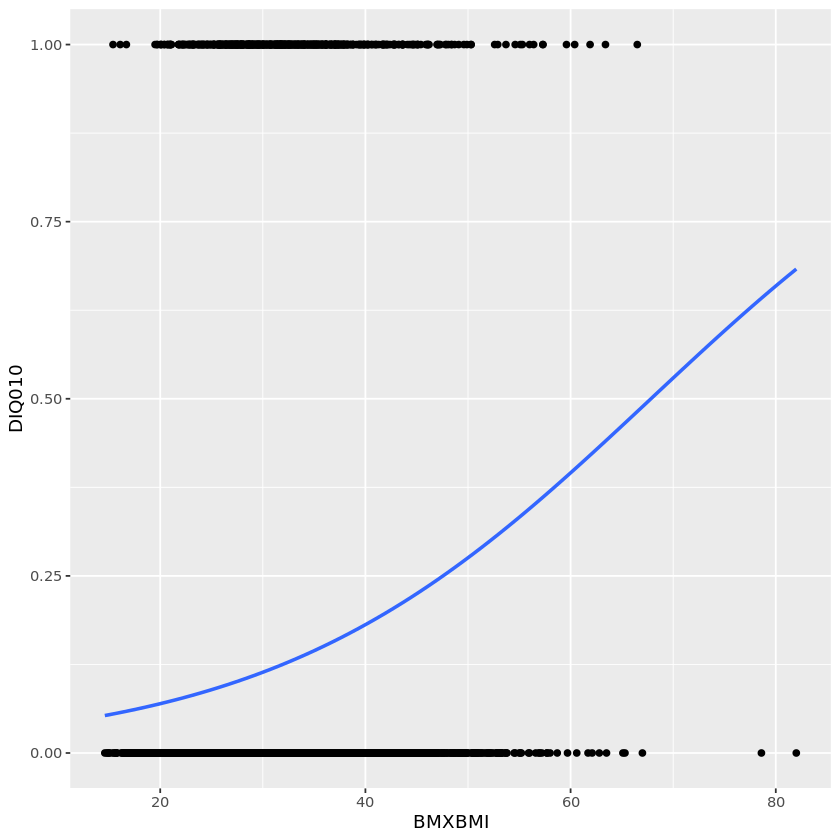

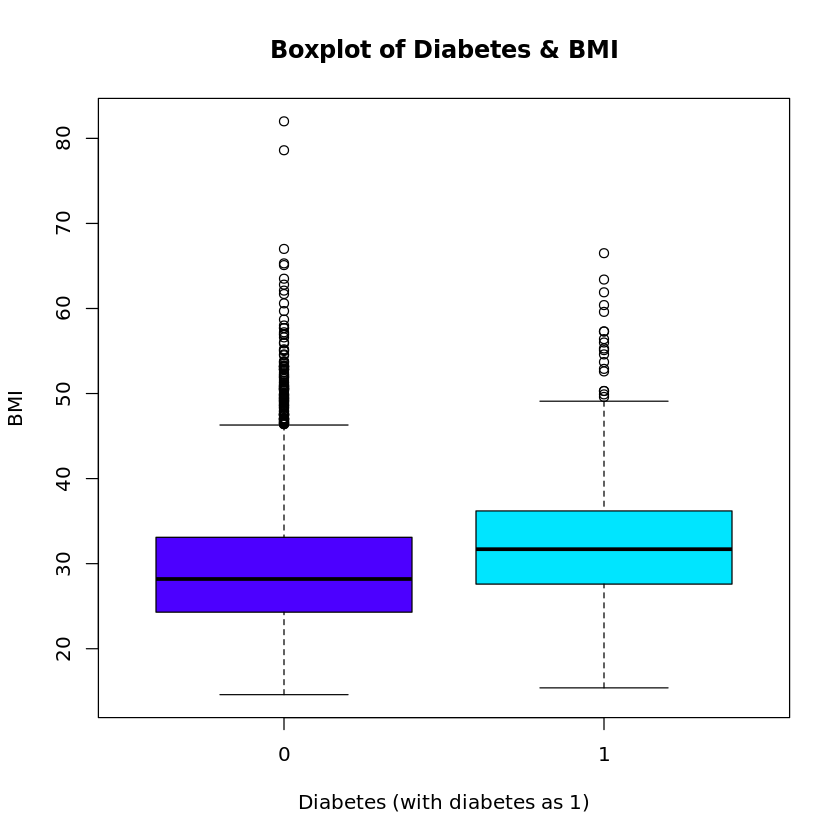

In [10]:
# 3.3
cat("\nProblem 3.3\n\n")
DvsBMI.res <- cor.test(OtData_selected$DIQ010, OtData_selected$BMXBMI, method = "pearson")
print(DvsBMI.res)

print(ggplot(OtData_selected, aes(x = BMXBMI, y = DIQ010)) +
    geom_point() +
    geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, formula = y ~ x))
boxplot(BMXBMI ~ DIQ010, data = OtData_selected, main = "Boxplot of Diabetes & BMI", xlab = "Diabetes (with diabetes as 1)", ylab = "BMI", col = topo.colors(2))

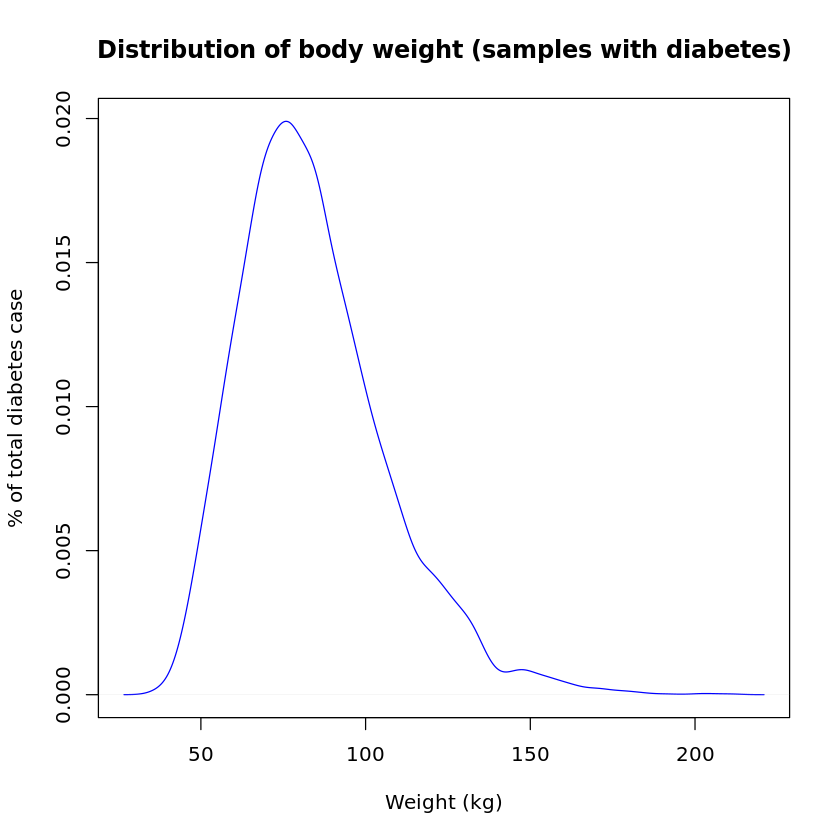

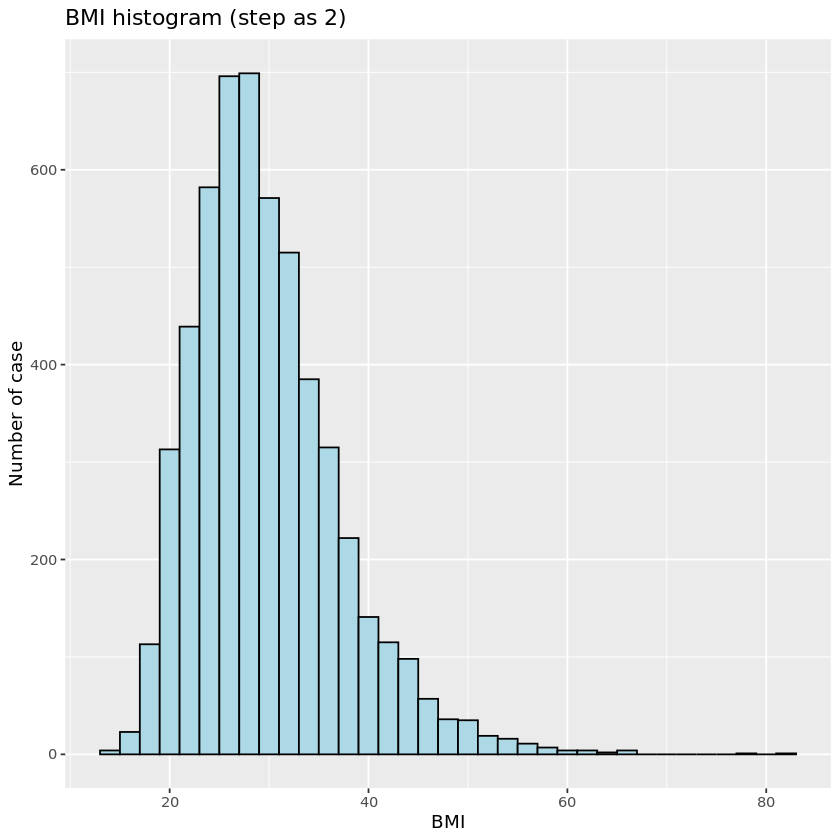

In [11]:
# 3.4
OtData_diabetes <- subset(OtData_selected, OtData_selected$DIQ010 == 1)
plot(density(OtData_selected$BMXWT), main = "Distribution of body weight (samples with diabetes)", xlab = "Weight (kg)", ylab = "% of total diabetes case", col = "Blue")
print(ggplot(OtData_selected, aes(x = BMXBMI)) +
    geom_histogram(binwidth = 2, col = "black", fill = "lightblue") +
    labs(title = "BMI histogram (step as 2)", x = "BMI", y = "Number of case"))